In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


In [14]:
data = pd.read_csv('who_suicide_statistics.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [16]:
data.head(15)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
5,Albania,1985,female,75+ years,NaN,34200.0
6,Albania,1985,male,15-24 years,NaN,301400.0
7,Albania,1985,male,25-34 years,NaN,264200.0
8,Albania,1985,male,35-54 years,NaN,296700.0
9,Albania,1985,male,5-14 years,NaN,325800.0


In [12]:
data.describe()

,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [5]:
data["suicides_no"] = data["suicides_no"].fillna(0)

In [6]:
data.count()

country        43776
year           43776
sex            43776
age            43776
suicides_no    43776
population     38316
dtype: int64

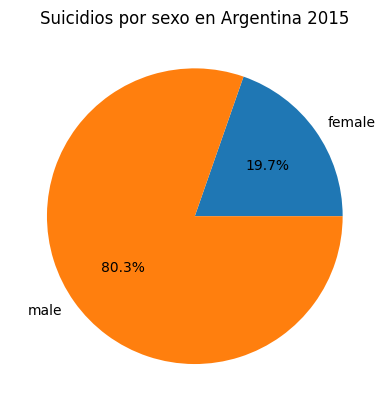

In [70]:
#Un gráfico circular de un solo año. Esto seria algo bueno
dato_2016 = data[(data['year']==2015) & (data['country']=='Argentina')].groupby('sex')['suicides_no'].sum()

plt.pie(
    dato_2016,                 # valores
    labels=dato_2016.index,    # etiquetas (M/F)
    autopct="%1.1f%%"        # mostrar porcentajes
)
plt.title("Suicidios por sexo en Argentina 2015")
plt.show()


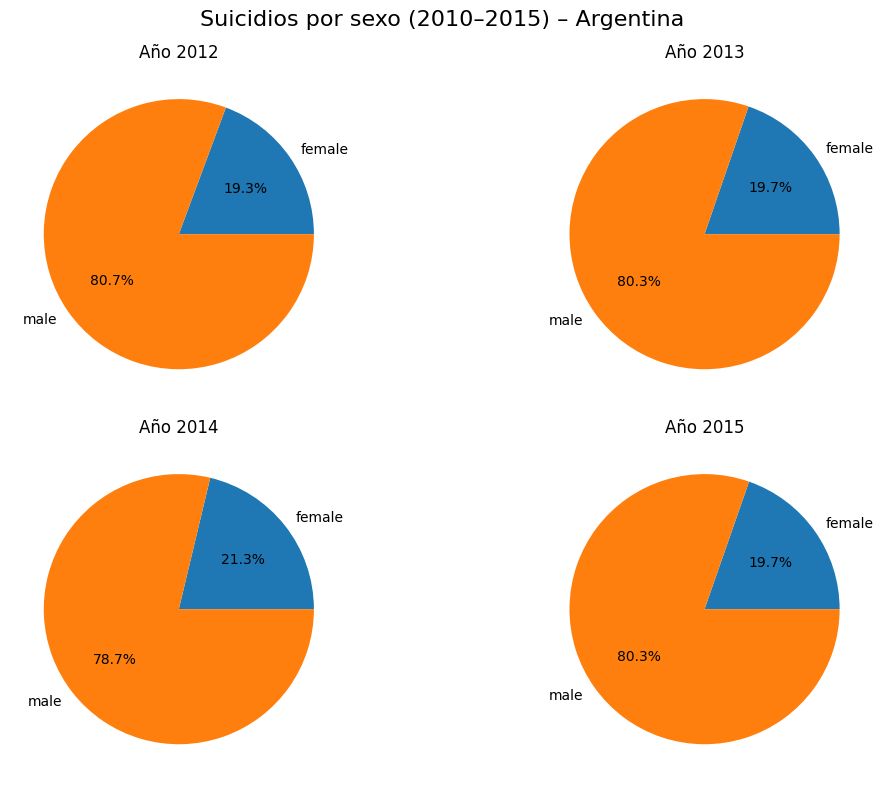

In [67]:
#Un gráfico circular para varios años. Esto no es tan bueno
filtro_2010_2016 = (data['year'] >=2010) &  (data['year']<=2015) & (data['country']== 'Argentina')
tabla = (data[filtro_2010_2016].groupby(['year','sex'])['suicides_no'].sum().unstack().fillna(0).sort_index() )

anios = range(2012,2016)
fia, axes = plt.subplots(2,2, figsize =(12,8))
for ax, anio in zip(axes.flat,anios):
    valores = tabla.loc[anio] 
    ax.pie(
        valores.values,
        labels=valores.index,
        autopct='%1.1f%%'
    )
    ax.set_title(f"Año {anio}")
plt.suptitle("Suicidios por sexo (2010–2015) – Argentina", fontsize=16)
plt.tight_layout()
plt.show()  



In [ ]:
#Un gráfico con barras apiladas para varios años. Esto es bueno, porque se ve claramente la diferencia